In [8]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os

In [9]:
PATH_TO_COORDINATES = "../Helix_files/"

In [19]:
#parse each file
file_library = {}
threshold_score = -3

for file in os.listdir(PATH_TO_COORDINATES)[1:]:
    df = pd.read_csv(PATH_TO_COORDINATES+"/"+file, sep="\t")
    df = df.drop(df[df.score<threshold_score].index)
    x = df["x_coord"].to_numpy()
    y = df["y_coord"].to_numpy()
    tup = (x,y)
    file_library.update({file: tup})

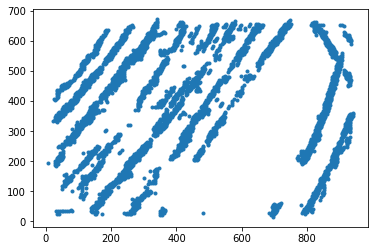

In [20]:
#visualize one file
img = file_library["Microtubules_00222.txt"]
plt.scatter(img[0],img[1], marker=".")

(657, 931)


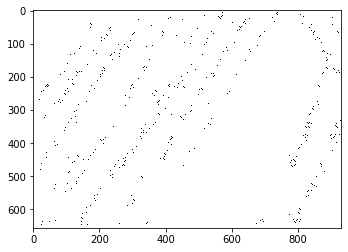

In [21]:
#plot data on numpy matrix
xmin = np.min(img[0])
xmax = np.max(img[0])

ymin = np.min(img[1])
ymax = np.max(img[1])

Field = np.zeros(((ymax-ymin),(xmax-xmin)))
print(Field.shape)
for i in range(img[0].shape[0]):
    Field[img[1][i]-(1+ymin),img[0][i]-(1+xmin)]=1
plt.imshow(np.flip(Field, axis=0), cmap = "binary")

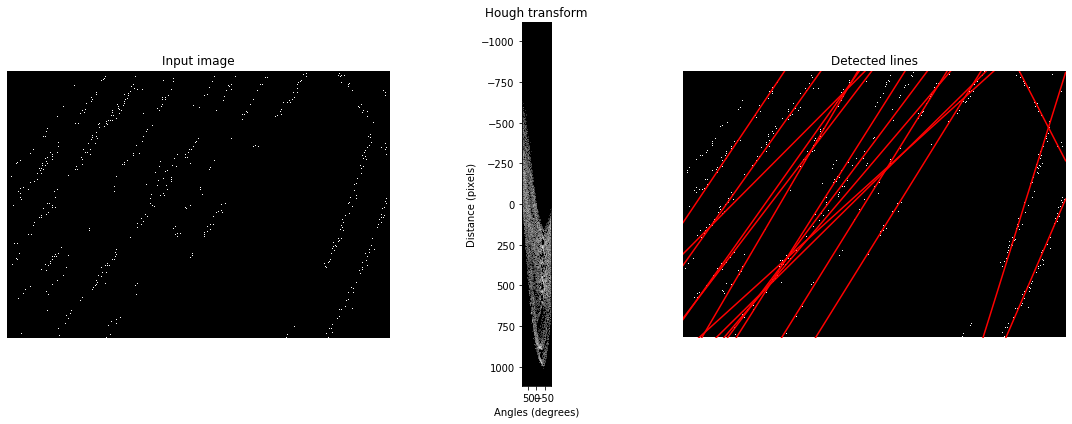

In [13]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image
image = np.flip(Field, axis=0)

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
h, theta, d = hough_line(image, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
origin = np.array((0, image.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Estimated number of clusters: 27')

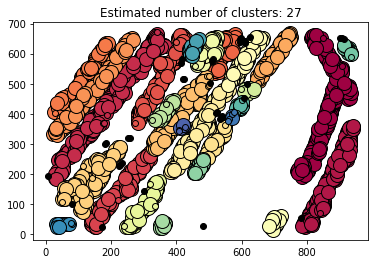

In [22]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################

#provide a m * 2 coordinate array for the data points on xy plane
X = np.concatenate((img[0][...,np.newaxis], img[1][...,np.newaxis]), axis = 1)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=15, min_samples=5).fit(X)
#obtain a mask for the useful data points, as defined by "core samples",
#they contain sufficient number of neighbours within the eps distance
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# obtain the classification labels mapped from each point
labels = db.labels_



# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
# create a set of labels
unique_labels = set(labels)
# create a corresponding set of colours for bijection to the the set of labels
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

list_of_clusters = []

# for each class label and its colour
for k, col in zip(unique_labels, colors):
    # set the colour to black if the class is assigned to -1 (noise)
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        
    # obtain a boolean vector to select for coordinates in X of the current k only
    class_member_mask = (labels == k)
    
    #obtain a list of coordinates from X if they belong to the current k(class) and they are "core samples"
    xy = X[class_member_mask & core_samples_mask]
    
    
    # plot the core samples as large dots
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    # plot the non-core samples as smaller dots using a mask for: current k, not "core samples"
    xy_not_core = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy_not_core[:, 0], xy_not_core[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    
    cluster = np.concatenate((xy, xy_not_core))
    list_of_clusters.append(cluster)

plt.title('Estimated number of clusters: %d' % n_clusters_)

MSE of the linear fit: 3615.6039747480672
MSE of the polynomial fit: 2227.6998705515166
Polynomial model chosen
(165.3450716845878, 685.6549283154122)
(592.3450716845878, 1112.6549283154122)
MSE of the linear fit: 2928.294389213023
MSE of the polynomial fit: 3216.2766609057053
Linear model chosen
(-9.322021066356779, 693.9724089226)
(506.2585277947146, 1209.5529577836714)
MSE of the linear fit: 19775.57619162942
MSE of the polynomial fit: 20594.256837211942
Linear model chosen
(-164.9786550969324, 857.847150535529)
(-29.57349162520442, 993.252314007257)
MSE of the linear fit: 6264.654564889259
MSE of the polynomial fit: 6045.6578283403305
Polynomial model chosen
(-172.74016438360258, 865.6086598221991)
(-44.3909184452111, 993.9579057605906)
MSE of the linear fit: 4152.3986336306025
MSE of the polynomial fit: 4647.926350380656
Linear model chosen
(-172.81957810272434, 865.5292461030774)
(-44.3909184452111, 993.9579057605906)
MSE of the linear fit: 854.466591011108
MSE of the polynomial 

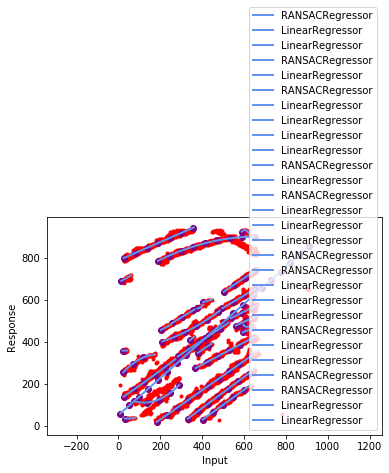

In [33]:
from utils import ransac_fit

for cluster in list_of_clusters:
    poly_o = ransac_fit.polyfit(cluster, 2, 1, disable_linear = False, directory_mode=False)
    arclength_o = ransac_fit.arclength(poly_o)
    x = ransac_fit.spacing(arclength_o, 60.218)
    
    y = poly_o["model"].predict(x)
    
    fig1 = plt.figure(1)
    ax1 = fig1.gca()
    ax1.scatter(x, y, color="purple")
